# Assignment 2: Gradient Descent

In [1]:
from math import log
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def gradient_descent(n, derivative_funcs: list, init_val: list, iters=300, alpha=0.02):
    '''Gradient Descent for n features'''

    assert len(derivative_funcs) == len(init_val) == n 

    t = init_val
    t_lst = [[] for _ in range(n)]

    for i in range(1, iters+1):
        new = t.copy()
        for j in range(n):
            t_lst[j].append(t[j])
            new[j] = t[j] - alpha * derivative_funcs[j](*t)
        if t == new: break
        t = new.copy()
        
    return t_lst, t, i

In [3]:
def plot_func(t1, t2, f, nt1=None, nt2=None, scatter=False):
    '''Helper function to plot two feature functions'''
    plt.figure(figsize=[16, 12])
    ax = plt.axes(projection='3d')
    ax.set_xlabel('t1', fontsize=16)
    ax.set_ylabel('t2', fontsize=16)
    ax.set_zlabel('Cost - f(t1, t2)')
    ax.plot_surface(t1, t2, f(t1, t2), cmap='winter', alpha=0.4)
    if scatter: ax.scatter(nt1, nt2, f(nt1, nt2))
    plt.show()

## Q1. 
Assume the following values for the arguments passed to the gradient descent algorithm <br/>
(as given in the notebook N5_The Gradient Descent Algorithm.ipynb; also discussed in class):

- initial_value = 0.5
- max_iter = 1000
- learning_rate = 0.02
- precision = 0.0001

Dry run the algorithm using calculator and fill the values in the following table for first five iterations of the algorithm.


### $$ g(t)=t^4-4t^2+5 $$

### $$ \frac{dg(t)}{dt}=4t^3-8t $$

| i | t | dg(t) | learning_rate*dg(t) | t_list |
|---|---|-------|---------------------|------- |
|1  |0.5|-3.5  |-1.75  |[0.5]|
|2  | 0.5700000000000001 | -3.8192280000000003 | -0.07638456 | [0.5, 0.5700000000000001]|
|3  | 0.6463845600000001 | -4.090804992865673 | -0.08181609985731346 | [0.5, 0.5700000000000001, 0.6463845600000001]|
|4  | 0.7282006598573135 | -4.28101536091076 | -0.0856203072182152 | [0.5, 0.5700000000000001, 0.6463845600000001, 0.7282006598573135]|
|5  | 0.8138209670755288 | -4.354578365531026 | -0.08709156731062052 | [0.5, 0.5700000000000001, 0.6463845600000001, 0.7282006598573135, 0.8138209670755288]|



## Q2. 
For Problem 3 given in notebook N5_The Gradient Descent Algorithm.ipynb:

### Problem 3
The following cost function has 2 parameters.
### $$ f(t1,t2)=\frac{1}{3^{-t1^2-t2^2}+1} $$

In [4]:
def f(t1, t2):
    return 1/(3**(-t1**2-t2**2)+1)

In [5]:
t1=np.linspace(-2,2,200)
t2=np.linspace(-2,2,200)
t1,t2=np.meshgrid(t1,t2) 

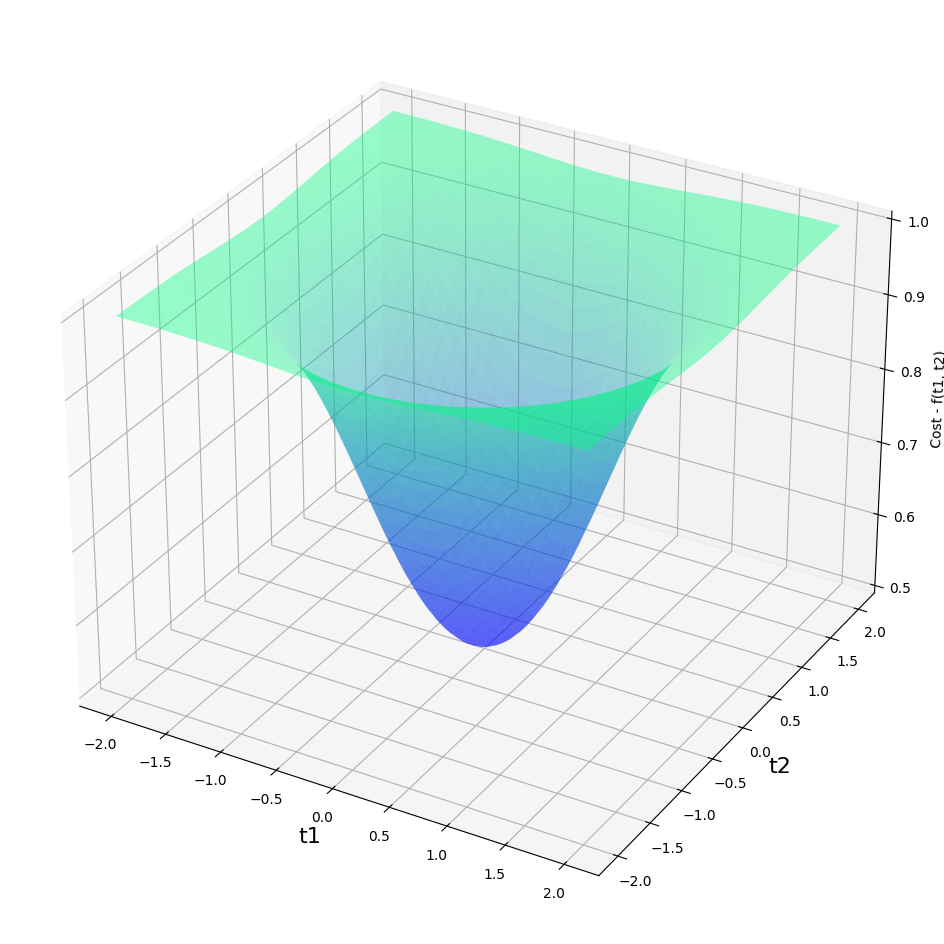

In [6]:
plot_func(t1, t2, f)

### a. After running the gradient descent algorithm, print the number of iteration and value of cost function at final values of t1_new and t2_new.

In [7]:
def df1(t1, t2):
    return (log(3)*2*t1*3**(-t1**2-t2**2))/(3**(-t1**2-t2**2)+1)**2

In [8]:
def df2(t1, t2):
    return (log(3)*2*t2*3**(-t1**2-t2**2))/(3**(-t1**2-t2**2)+1)**2

In [9]:
t_lst, t, i = gradient_descent(2, [df1, df2], alpha = 0.1, iters = 20000, init_val=[1.8, 1.5])
print('[t1, t2] =', t)
print('Minima at =', f(*t))
print('Iterations:', i)


[t1, t2] = [4e-323, 4e-323]
Minima at = 0.5
Iterations: 13339


### b. Seeing the values obtained in part a, do you think the algorithm has converged? If not what could be the potential reasons?

It can be seen that the algorthm converged at iteration number 13339.

## Visualising for fun <3

In [10]:
nt1 = np.array(t_lst[0])
nt2 = np.array(t_lst[1])

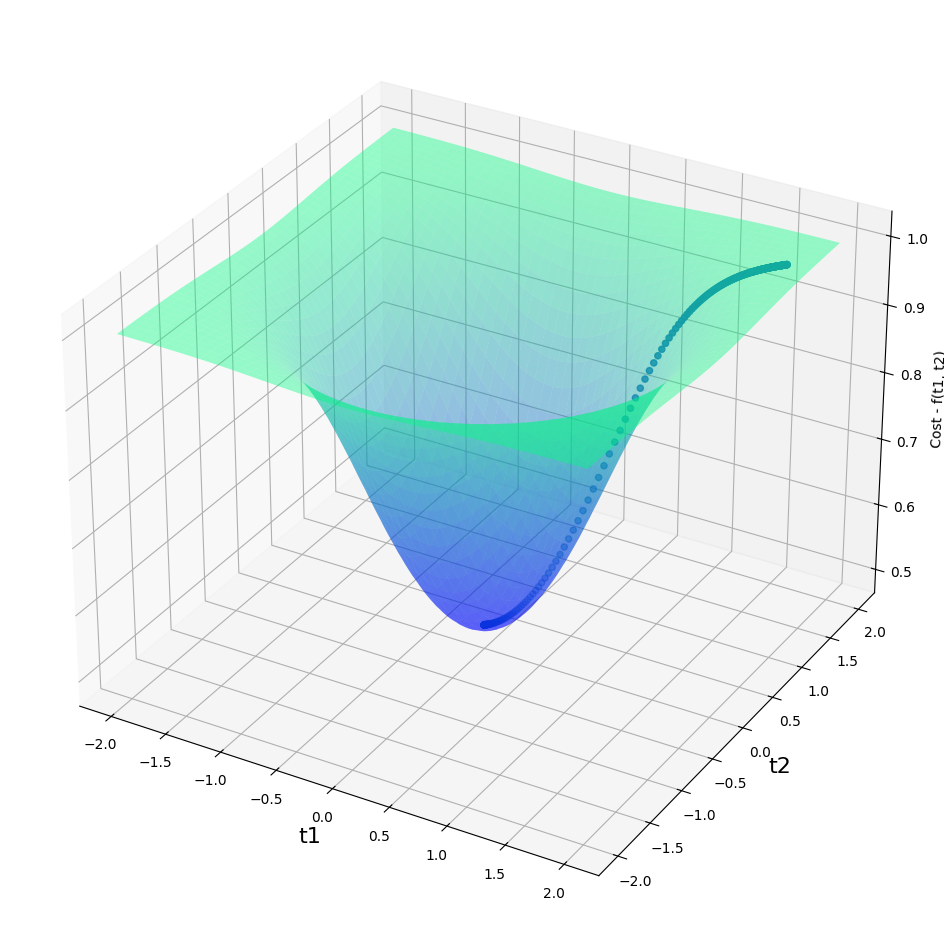

In [11]:
plot_func(t1, t2, f, nt1, nt2, scatter=True)


### c. Try the following to fix the issue observed in part b:
- Increase the number of iterations appropriately.
- Insert a terminating condition in the algorithm’s loop.

The algorithm converged so I won't make any changes :))

## Q3. 
Consider the following function having two parameters: 
### $$ f(t1,t2) = \sqrt{t1^2+t2^2} $$

### a. Plot this function using matplotlib in Python, for -1 ≤ t1 ≤ +1 and -1 ≤ t2 ≤ +1.

In [12]:
def f3(t1, t2):
    return (t1**2 + t2**2)**0.5

In [13]:
t1 = np.linspace(-1, 1, 1000)
t2 = np.linspace(-1, 1, 1000)
t1, t2 = np.meshgrid(t1, t2)

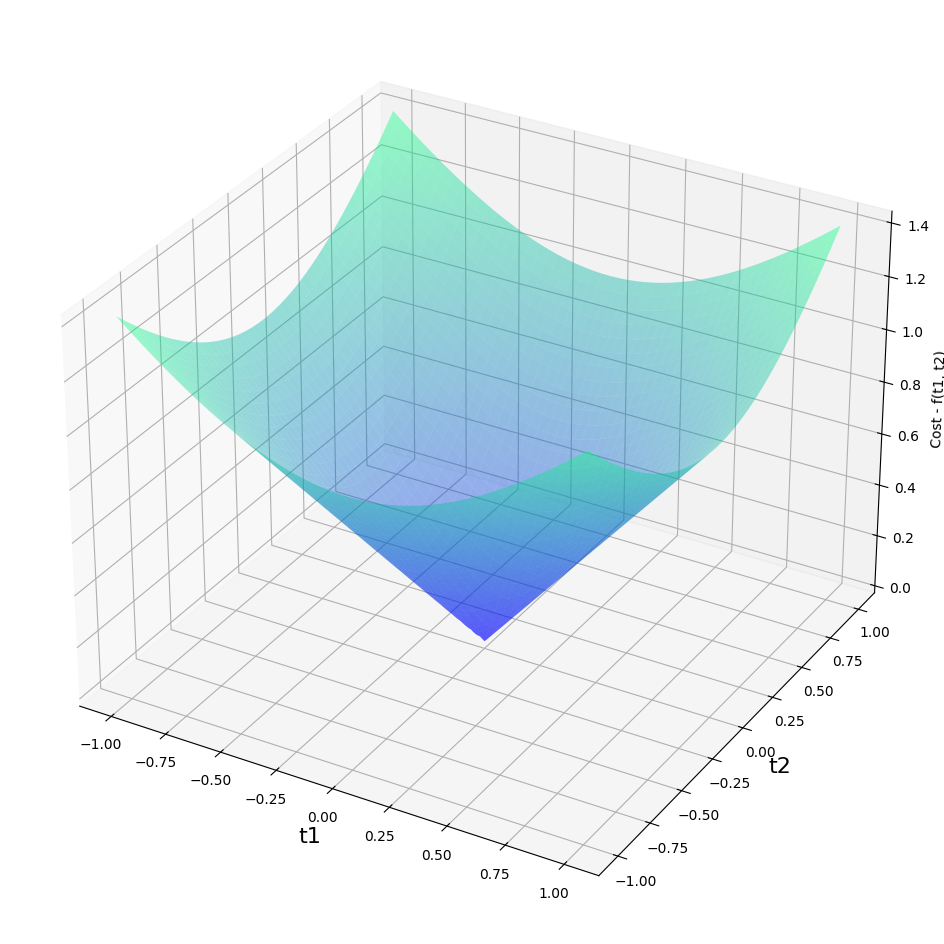

In [14]:
plot_func(t1, t2, f3)

### b. Is the given function convex?

Yes, the given beautiful function is convex!

### c. Find partial derivatives of the function w.r.t. t1 and t2 and implement them in Python.


In [15]:
def df3_1(t1, t2):
    return t1/(t1**2 + t2**2)**0.5

In [16]:
def df3_2(t1, t2):
    return t2/(t1**2 + t2**2)**0.5

### d. Run gradient descent and print the resulting number of iterations, values of t1, t2 and the cost function.<br/> Set initial values for t1 and t2 appropriately. Set number of iterations to 5000 and learning rate to 0.1.

In [17]:
t_lst, t, i = gradient_descent(2, [df3_1, df3_2], init_val=[0.1, 0.1], iters=5000, alpha=0.1)
print('[t1, t2] =', t)
print('Minima at =', f3(*t))
print('Iterations:', i)

[t1, t2] = [-0.041421356237309526, -0.041421356237309526]
Minima at = 0.05857864376269052
Iterations: 5000


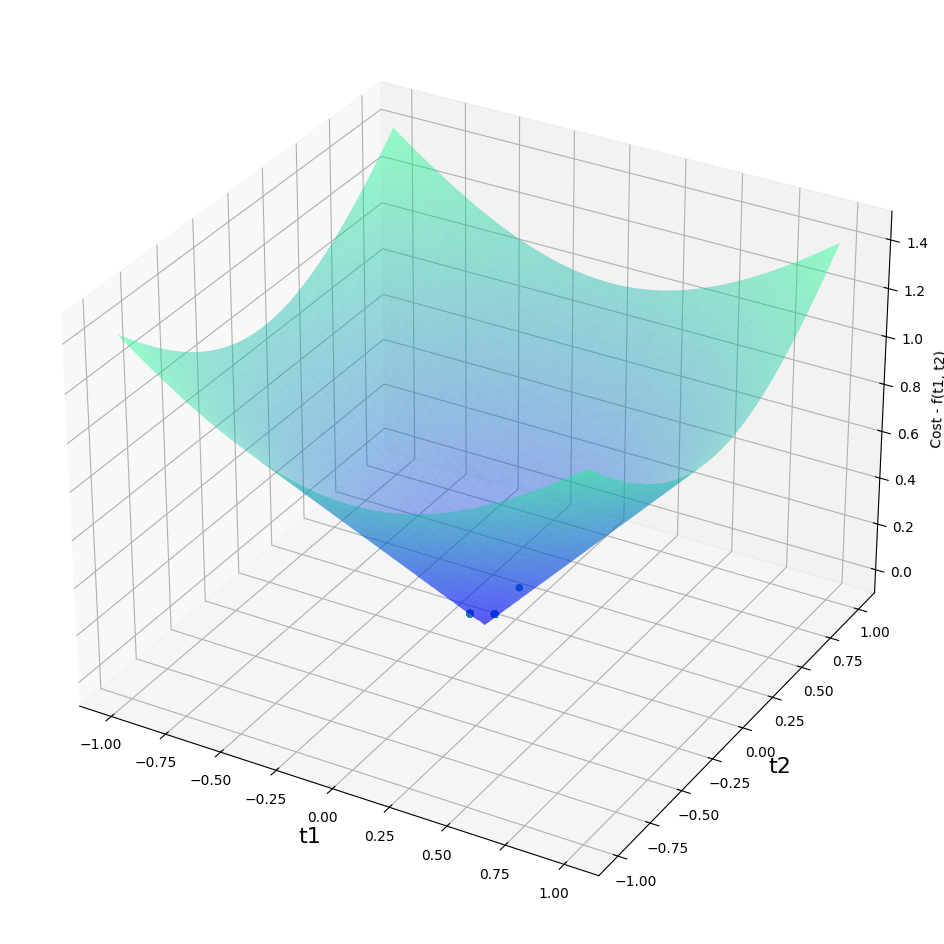

In [18]:
nt1 = np.array(t_lst[0])
nt2 = np.array(t_lst[1])
plot_func(t1, t2, f3, nt1, nt2, scatter=True)

### e. Observing the results of part d, do you think the algorithm has converged? If not then identify the cause and fix it.

Nope, it has certainly not converged :') <br/>
As a rough guess, maybe the number of iterations were too low or changing the initial value could help. Well, let's try both.

In [19]:
t_lst, t, i = gradient_descent(2, [df3_1, df3_2], init_val=[0.2,0.01], iters=20000, alpha=0.1)
print('[t1, t2] =', t)
print('Minima at =', f3(*t))
print('Iterations:', i)

[t1, t2] = [0.0002495322244310816, 1.2476611221553385e-05]
Minima at = 0.0002498439450078738
Iterations: 20000


In [20]:
nt1 = np.array(t_lst[0])
nt2 = np.array(t_lst[1])

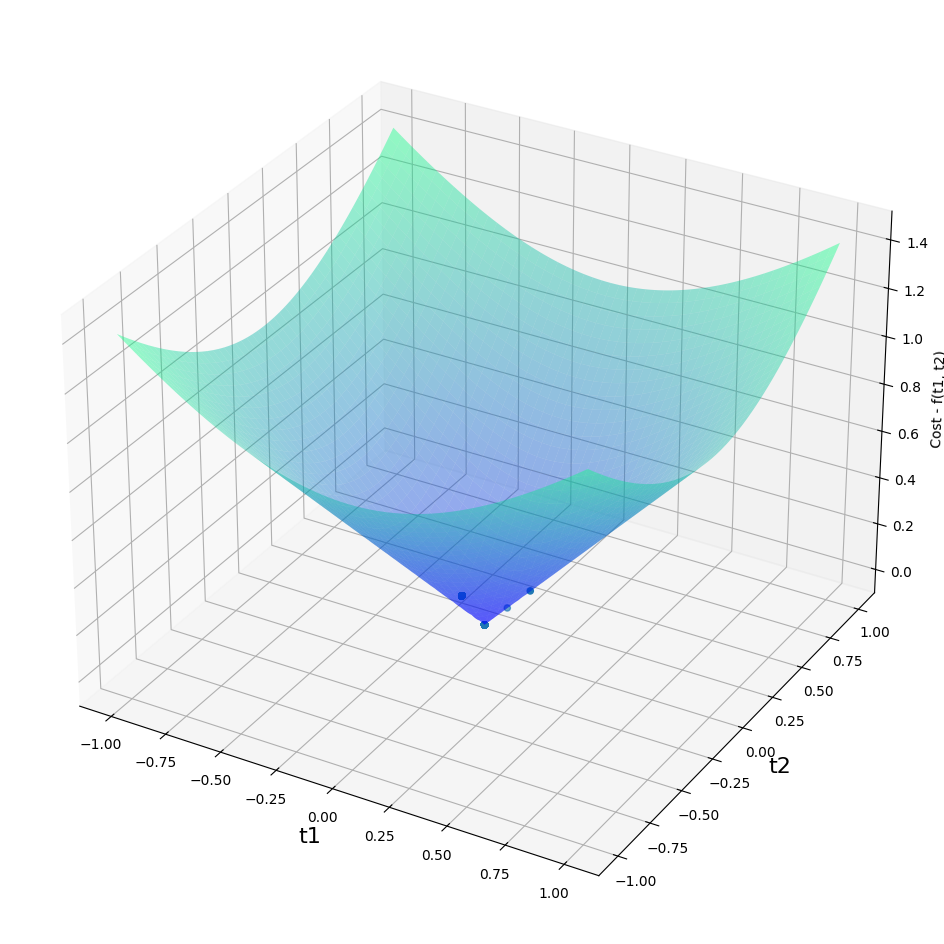

In [21]:
plot_func(t1, t2, f3, nt1, nt2, scatter=True)

Perfection!

### f. Plot cost function against various values of learning rate and try finding the optimal value for learning rate.

[t1, t2] = [0.20000000000000012, 0.010000000000000004]
Minima at = 0.200249843945008
Iterations: 20000


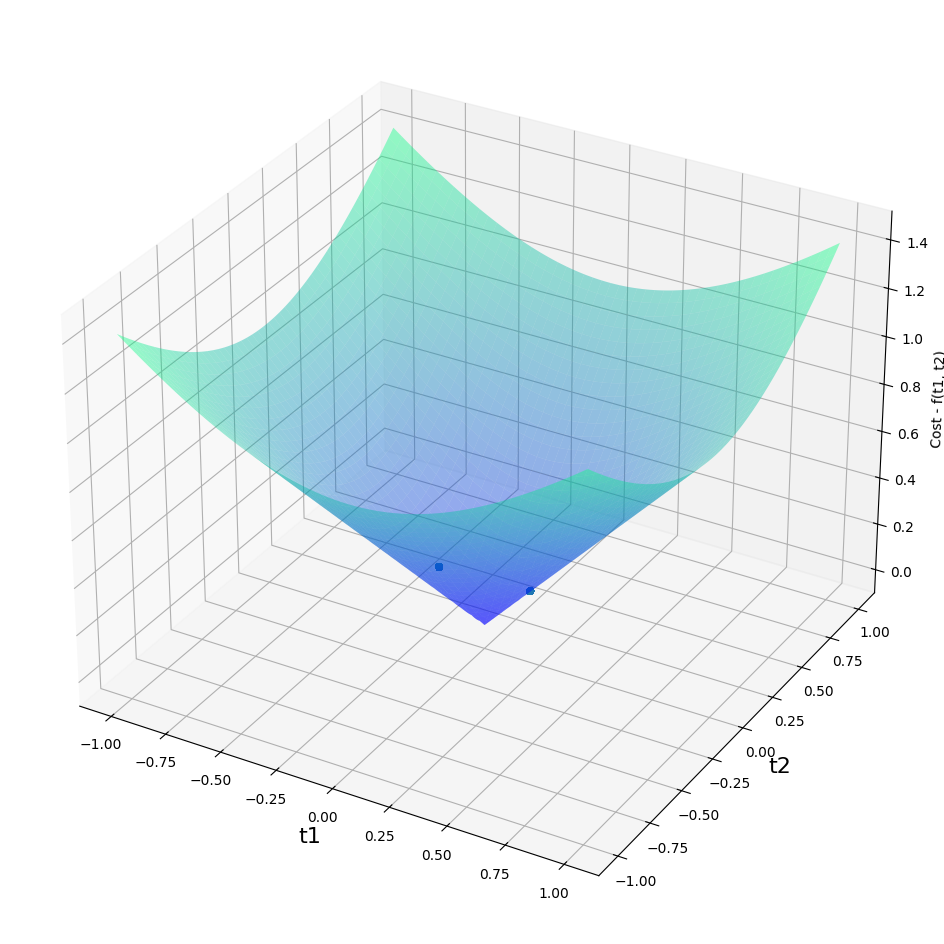

In [22]:
t_lst, t, i = gradient_descent(2, [df3_1, df3_2], init_val=[0.2,0.01], iters=20000, alpha=0.4)
print('[t1, t2] =', t)
print('Minima at =', f3(*t))
print('Iterations:', i)
nt1 = np.array(t_lst[0])
nt2 = np.array(t_lst[1])
plot_func(t1, t2, f3, nt1, nt2, scatter=True)

[t1, t2] = [-0.19950093555113776, -0.009975046777557998]
Minima at = 0.1997501560549921
Iterations: 20000


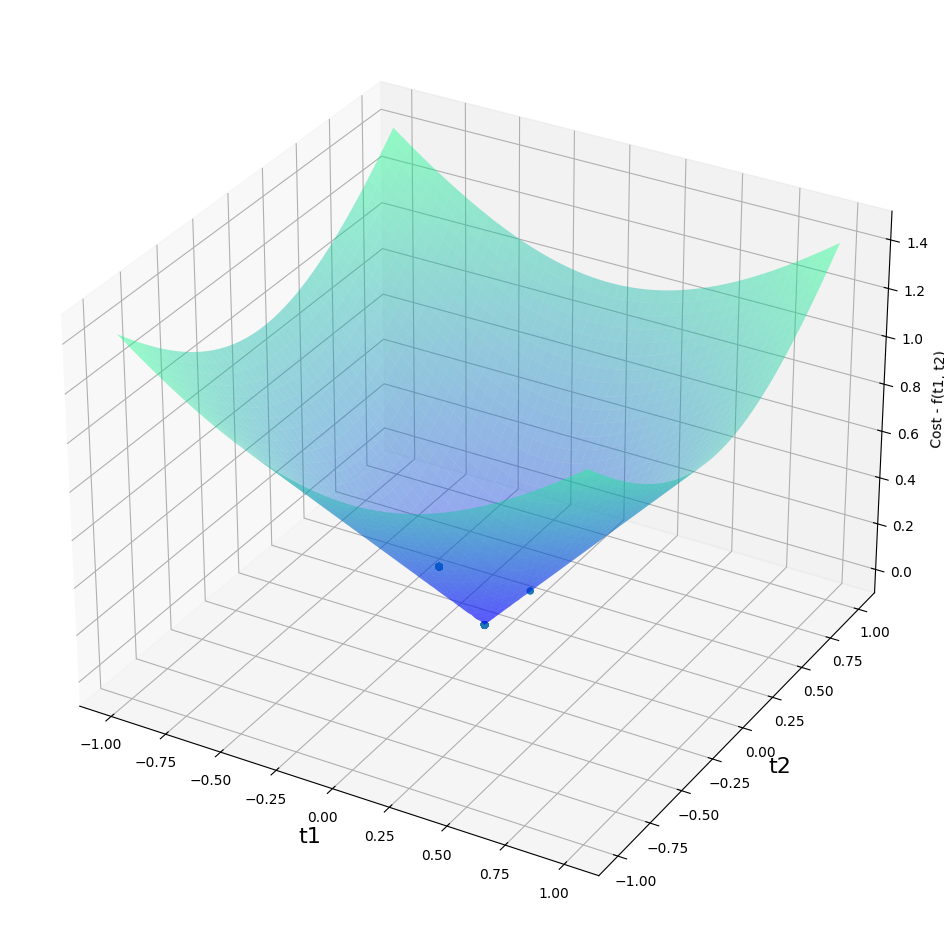

In [23]:
t_lst, t, i = gradient_descent(2, [df3_1, df3_2], init_val=[0.2,0.01], iters=20000, alpha=0.2)
print('[t1, t2] =', t)
print('Minima at =', f3(*t))
print('Iterations:', i)
nt1 = np.array(t_lst[0])
nt2 = np.array(t_lst[1])
plot_func(t1, t2, f3, nt1, nt2, scatter=True)

[t1, t2] = [0.00024953222443101566, 1.2476611221550783e-05]
Minima at = 0.0002498439450078078
Iterations: 20000


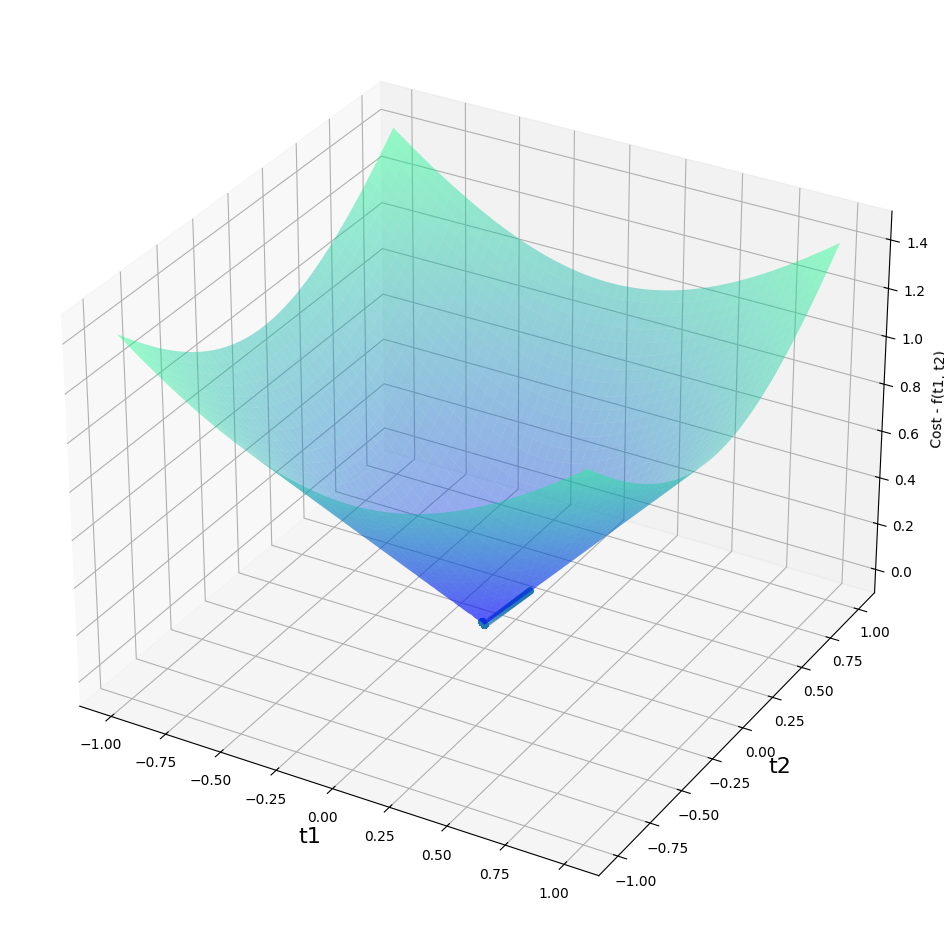

In [24]:
t_lst, t, i = gradient_descent(2, [df3_1, df3_2], init_val=[0.2,0.01], iters=20000, alpha=0.01)
print('[t1, t2] =', t)
print('Minima at =', f3(*t))
print('Iterations:', i)
nt1 = np.array(t_lst[0])
nt2 = np.array(t_lst[1])
plot_func(t1, t2, f3, nt1, nt2, scatter=True)

0.01 seems to be the best value for learning rate.

## Q4. 
For problem 1 from the notebook N5_The Gradient Descent Algorithm.ipynb

### a. Adjust the gradient descent algorithm as follows:

![formula](images/new_formula.png)

In [25]:
def mod_gradient_descent(derivative_func, init_val=0.5, precision=0.001, iters=300, alpha=0.02,):
    '''Gradient Descent for one feature'''
    t = init_val
    t_lst = []

    for i in range(1, iters+1):
        t_lst.append(t)
        change = alpha * derivative_func(t)
        t = t + change
        
        if abs(change) <= precision:
            break
        
    return t_lst, t, i

### b. Plot the function and resulting trace from the gradient descent algorithm.

## Problem 1
### $$ g(t)=t^4-4t^2+5 $$

### $$ \frac{dg(t)}{dt}=4t^3-8t $$

In [26]:
def g(t):
    return t**4-4*t**2+5

In [27]:
def dg(t):
    return 4*t**3-8*t

In [28]:
t_lst, t, i = mod_gradient_descent(dg, init_val=0.5, alpha=0.02, iters=1000, precision=0.0001)
print('t =', t)
print('Iterations:', i)

t = 0.0005099962810709538
Iterations: 40


In [29]:
t_1=np.linspace(-2,2,1000)

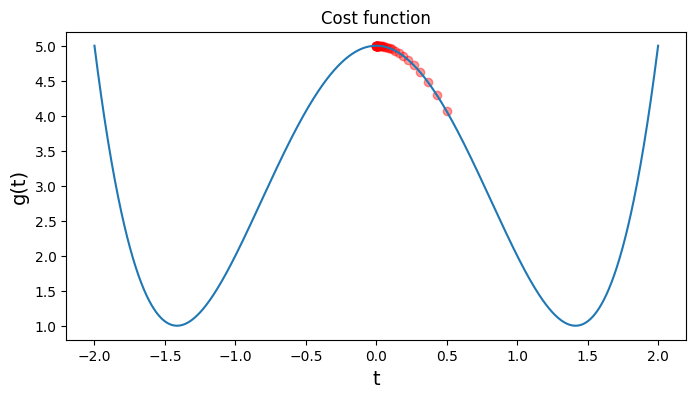

In [30]:
plt.figure(figsize=[8, 4])
plt.plot(t_1,g(t_1))
plt.title('Cost function')
plt.xlabel('t', fontsize=14)
plt.ylabel('g(t)', fontsize=14)
plt.scatter(t_lst, g(np.array(t_lst)), color='red', alpha=0.4)
plt.show()

:O Whaaa?


### e. What difference do you observe in the output?

![just for fun](images/meme.gif)

The given function isn't convex. Our algorithm failed because it got converged at the maxima thinking of it as the minima. Hence frq bohot hai.

## Q5.

Consider the following function having three parameters: 

## $$ f(t1,t2,t3) = t1^2 + t2^2 + t3^2 $$

### a. Implement the function and its three partial derivatives w.r.t. to t1, t2 and t3 in Python.

In [31]:
def f5(t1=1, t2=2, t3=1):
    return t1**2 + t2**2 + t3**2

In [32]:
def df5_1(t1, t2, t3):
    return 2*t1

In [33]:
def df5_2(t1, t2, t3):
    return 2*t2

In [34]:
def df5_3(t1, t2, t3):
    return 2*t3

### b. Run gradient descent and print the resulting number of iterations, values of t1, t2, t3 and the cost function. Set initial values for t1, t2 and t3 appropriately. Set number of iterations to 5000 and learning rate to 0.02.

In [35]:
t_lst, t, i = gradient_descent(3, [df5_1, df5_2, df5_3], init_val=[0.1, 0.2, 0.3], iters=5000, alpha=0.02)
print('[t1, t2, t3] =', t)
print('Minima found at:', f5(*t))
print('Iterations:', i)

[t1, t2, t3] = [2.2707284320516864e-90, 4.541456864103373e-90, 6.812185296154997e-90]
Minima found at: 7.21869065697899e-179
Iterations: 5000


### c. Manually trace the algorithm run in part b for first 3 iterations.

| i | t1 | t2 | t3 | df5_1(t1) | df5_2(t2) | df5_3(t3) | t_list |
|---|---|---|---|-------|---|--|------- |
|1 |0.1|0.2|0.3|0.2|0.4|0.6|[[0.1],[0.2],[0.3]]|
|2 |0.096|0.192|0.288|0.192|0.384|0.576|[[0.1, 0.096], [0.2, 0.192], [0.3, 0.288]]|
|3 |0.09216|0.18432|0.27648|0.18432|0.36864|0.27648|[[0.1, 0.096, 0.09216], [0.2, 0.192, 0.18432], [0.3, 0.288, 0.27648]]|


### d. Observing the results of part b, do you think the algorithm has converged to global minimum? If not then identify the cause and fix it.

Nope, it has not converged. Increasing iterations might help.

In [36]:
t_lst, t, i = gradient_descent(3, [df5_1, df5_2, df5_3], init_val=[1, 2, 3], iters=20000, alpha=0.02)
print('[t1, t2, t3] =', t)
print('Minima found at:', f5(*t))
print('Iterations:', i)

[t1, t2, t3] = [6e-323, 6e-323, 6e-323]
Minima found at: 0.0
Iterations: 18200


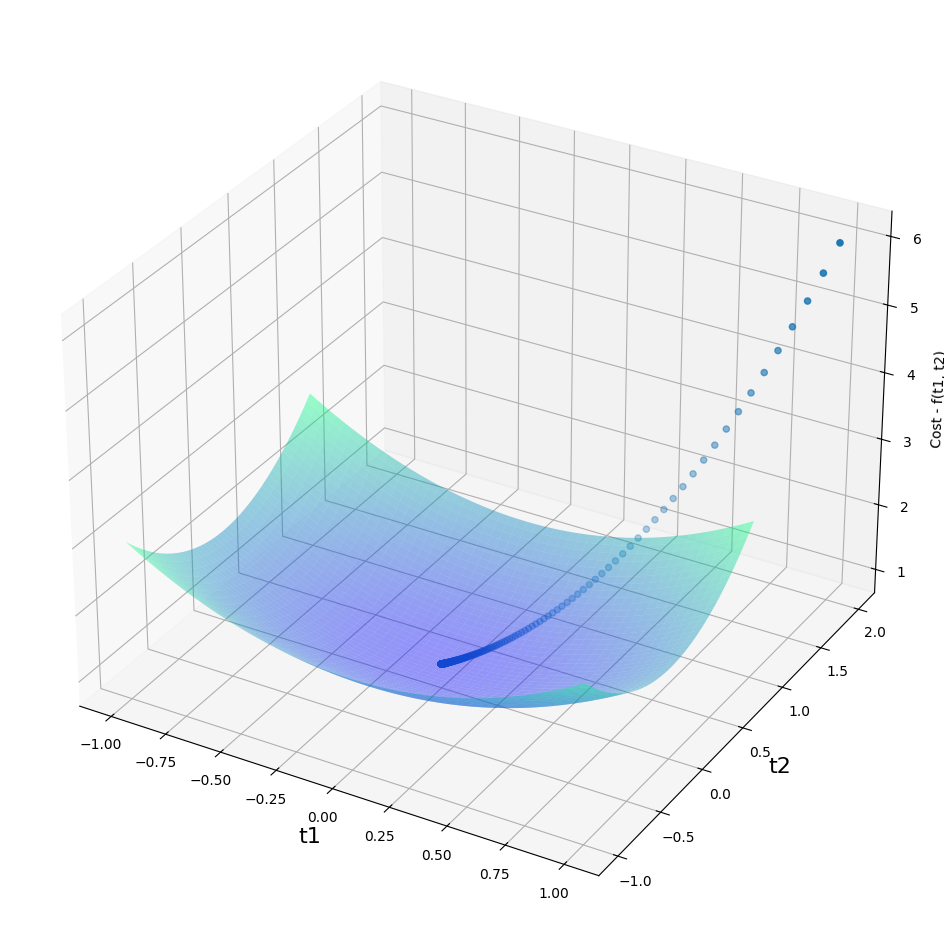

In [37]:
nt1 = np.array(t_lst[0])
nt2 = np.array(t_lst[1])
nt3 = np.array(t_lst[2])
plot_func(t1, t2, f5, nt1, nt2, scatter=True)


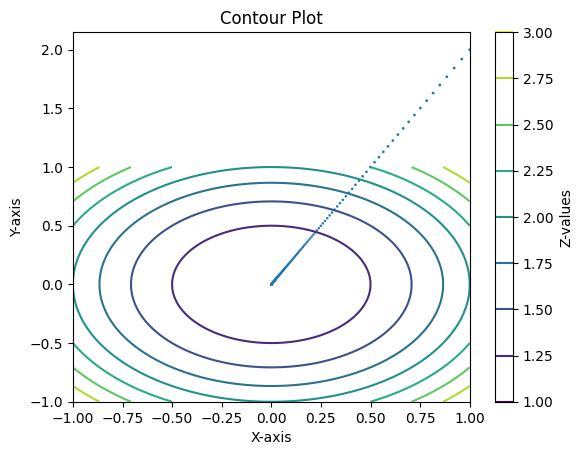

In [38]:
X = t1
Y = t2
Z = f5(t1, t2)

contour = plt.contour(X, Y, Z)

plt.colorbar(contour, label='Z-values')
plt.scatter(nt1, nt2, f(nt1, nt2))
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Plot')

plt.show()

Looks good!